<a href="https://colab.research.google.com/github/dcw8161/Walmart-Sales-Forecasting/blob/main/Walmart_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EAD

In [2]:
df_features = pd.read_csv('/content/features.csv') # read datasets
df_stores = pd.read_csv('/content/stores.csv')
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')


In [3]:
print('df_features_shape:', df_features.shape) # finding the shape
print('df_stores_shape:', df_stores.shape)
print('df_train_shape:', df_train.shape)
print('df_test_shape:', df_test.shape)

df_features_shape: (8190, 12)
df_stores_shape: (45, 3)
df_train_shape: (421570, 5)
df_test_shape: (115064, 4)


In [5]:
df_train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
df_stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [8]:
df1 = df_train.merge(df_features, on=['Store', 'Date'], how='left') # merge train and features datasets
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2010-02-19,41595.55,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2010-02-26,19403.54,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df1.merge(df_stores, on=['Store'], how='inner') # merge store dataset to megred data set of train and features
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,2010-02-19,41595.55,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
3,1,1,2010-02-26,19403.54,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
4,1,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315


In [10]:
df.columns # columns of the megred dataset

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [11]:
df.drop('IsHoliday_y', axis=1, inplace=True) # drop the duplicate isholiday column

In [12]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,2010-02-19,41595.55,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
3,1,1,2010-02-26,19403.54,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
4,1,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315


In [13]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the isholiday_x as isholiday
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,2010-02-19,41595.55,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
3,1,1,2010-02-26,19403.54,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
4,1,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315


In [14]:
df.shape

(421570, 16)

In [15]:
# number of stores
df['Store'].nunique()

45

In [16]:
#number of departments
df['Dept'].nunique()

81

In [17]:
df_d= df.groupby(['Dept','Weekly_Sales']).size()
df_d

Dept  Weekly_Sales
1     711.11          1
      732.58          1
      765.00          1
      853.09          1
      912.81          1
                     ..
99    6280.00         1
      6910.00         1
      8570.00         1
      12225.00        1
      12550.00        1
Length: 398545, dtype: int64

In [18]:
df_neg = df[(df['Weekly_Sales'] < 0)]
df_neg

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2384,1,18,2012-05-04,-1.27,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
6048,1,47,2010-02-19,-863.00,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
6049,1,47,2010-03-12,-698.00,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
6051,1,47,2010-10-08,-58.00,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,118221
419598,45,80,2010-02-19,-0.27,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,118221
419603,45,80,2010-04-16,-1.61,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,118221
419614,45,80,2010-07-02,-0.27,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,118221


In [19]:
df_neg.shape

(1285, 16)

In [20]:
df = df.loc[df['Weekly_Sales'] > 0]

In [21]:
df.shape

(420212, 16)

In [22]:
# Data Range
df['Date'].head(5)


0    2010-02-05
1    2010-02-12
2    2010-02-19
3    2010-02-26
4    2010-03-05
Name: Date, dtype: object

start date: 2010-02-05 (February, 2010)

In [23]:
df['Date'].tail(5)

421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, dtype: object

Last date: 2012-10-26 (October, 2012)

In [24]:
df_holiday = df.loc[df['IsHoliday'] == True]
df_holiday['Date'].unique()


array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [25]:
df_not_holiday = df.loc[df['IsHoliday'] == False]
df_not_holiday['Date'].nunique()

133

In [26]:
df = df.fillna(0)

In [27]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [28]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [ ]:
# Exploratory Data Analysis using latest AI based AutoEDA Package - sweetviz
!pip install sweetviz

In [29]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df)
# Convert the report to HTML
Employee_EDA_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Downloading the EDA report to local machine
from google.colab import files
files.download("SWEETVIZ_REPORT.html")

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
!pip install pandas-profiling --upgrade

In [31]:
pd.__version__

'1.5.3'

In [32]:
!pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (30 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 3.0.1 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [33]:
!pip install ydata-profiling

In [34]:
from ydata_profiling import ProfileReport

In [35]:
df_eda_report = ProfileReport(df, minimal=True)

In [36]:
df_eda_report.to_file('Walmart.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[Tableau_Visualizations_EDA](https://public.tableau.com/app/profile/darshika.keerthisinghe/viz/WalmartSalesForecastingEDA/Story1?publish=yes)

1.	1	Total Number of Stores: The dataset comprises 45 stores.
2.	Total Number of Store Types: There are 3 distinct store types.
3.	Total Number of Departments: Across all stores, there are 81 departments.
4.	Years Considered in the Dataset: The data spans the years 2010, 2011, and 2012.
5.	Top 5 Stores Based on Avg. Sales:

    *   Store numbers: 20, 4, 14, 13, and 2 exhibit the highest average sales.
    *   The lowest average sales occur in stores 33, 44, 5, 36, and 38.

    *  The highest average sales amount to 29.5K dollars, while the lowest average sales are at $5.7K.


6.	Yearly Variation in Avg. Sales:

    *   In 2010, the highest average sales reach $208.1M.
    *   Conversely, in 2012, the lowest average sales amount to $200M.

7.	Sales Distribution by Holiday and Non-Holiday Periods:
    *   Holiday sales constitute 7.5% of total sales.
    *   Non-holiday sales account for 92.5%.
8.	Average Weekly Sales by Store Types:
    *  The overall average weekly sales across the three store types are $14.0K.
    * Notably, this average surpasses the highest sales observed in store types C and B.
9.	Store Types:
    *  There are three distinct store types.
    *  Type A boasts the highest average weekly sales, amounting to $20.1K.
10.	Total Sales by Store Types:
    *   Type A: Accounts for 64.28% of total sales.
        *  Holiday sales: 4.8%
        *  Non-holiday sales: 59.48%
    *   Type B: Contributes 29.7% to total sales.
        *   Holiday sales: 2.28%
        *   Non-holiday sales: 27.42%
    *   Type C: Represents 6.02% of total sales.
        *   Holiday sales: 0.42%
        *   Non-holiday sales: 5.6%
11.	Average Sizes of Store Types A, B, and C:
    *   Type A: Average size is 177,248.
    *   Type B: Average size is 101,191.
    *   Type C: Average size is 40,542.
    *   Average Sales by Store Types:
        *   Type A: $20.1K
        *   Type B: $12.2K
        *   Type C: $9.5K
### Sales dependency on size is evident.
12.	Temperature Variation by Store Types:
    *   Type C: Experiences the highest temperature.
    *   Type A: Maintains a median temperature.
    *   Type B: Registers the lowest temperature.
### Sales show no correlation with temperature.
13.	Monthly Sales Trends:
    *   November: Thanksgiving sees the highest average sales.
    *   Sales decline in the order of November, February, September, and December.
    *   Holiday Type Sales Order:
        * Thanksgiving
        * Super Bowl
        * Labor Day
        * Christmas (lowest sales)
14.	Year 2012 Data:
    *  No data available after November.
    *  Weekly sales trends remain consistent across all three years
15.	Factors Unrelated to Weekly Sales:
    *  Unemployment
    *  CPI
    *  Temperature
    *  Fuel price
16.	Scatter Plot and Department 72:
    *   Department 72 exhibits the highest average sales in the scatter plot.
## This comprehensive summary captures the key insights from the dataset.

















   









































In [29]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [30]:
df_t = df.copy()

In [31]:
type = {'A':1, 'B': 2, 'C': 3}
df_t['Type'] = df_t['Type'].replace(type)
df_t.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,151315
1,1,1,2010-02-12,46039.49,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,151315
2,1,1,2010-02-19,41595.55,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,151315
3,1,1,2010-02-26,19403.54,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,151315
4,1,1,2010-03-05,21827.90,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,151315


In [32]:
df_drop = ['Temperature', 'CPI', 'Unemployment', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5']
df_t.drop(df_drop, axis=1, inplace=True)
df_t.shape

(420212, 7)

In [33]:
df['MarkDown5'].dtypes

dtype('float64')

In [35]:
df['MarkDown1'].value_counts()

0.0    420212
Name: MarkDown1, dtype: int64

<ipython-input-34-8b5907224dbd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_t.corr().abs(), annot=True, cmap="crest" )


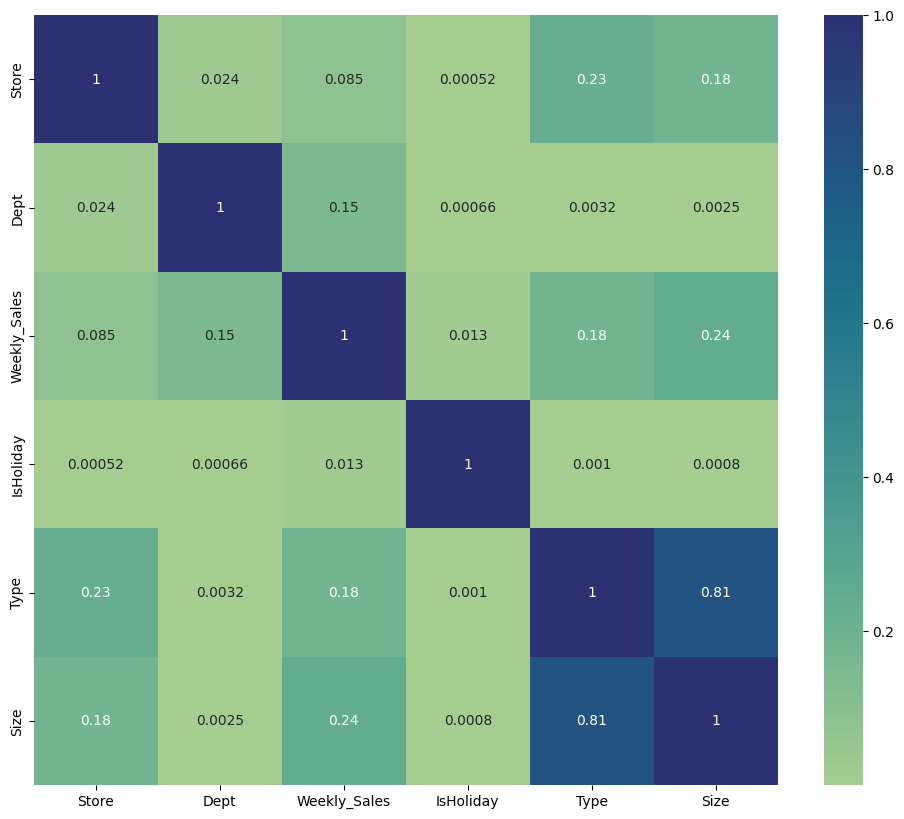

In [34]:
plt.figure(figsize = (12,10))
sns.heatmap(df_t.corr().abs(), annot=True, cmap="crest" )
plt.show()

## Auto ML

In [35]:
# Method 1 - Doing Auto ML with PyCaret
!pip install pycaret --upgrade

In [38]:
from pycaret.anomaly import *

In [39]:
anomaly_model = setup(df_t)

,Description,Value
0,Session id,1192
1,Original data shape,"(420212, 7)"
2,Transformed data shape,"(420212, 149)"
3,Numeric features,5
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [ ]:
knn = create_model('knn')

In [ ]:
knn_predictions = predict_model(knn, data = df_t)
knn_predictions

In [ ]:
knn_predictions.Anomaly.value_counts()

In [ ]:
knn_predictions.shape

In [ ]:
df_an = knn_predictions.loc[knn_predictions["Anomaly"] == 0]
df_an.shape

In [ ]:
df_F=df_t.drop(columns=['Anomaly', 'Anomaly_Score'])
df_F.shape

In [36]:
#To import all Classification related Pycaret libraries
from pycaret.regression import *

In [42]:
# Setting up the classification ML experiment
regression_model_setup = setup(df_t, target = 'Weekly_Sales', normalize = True,
                                   remove_outliers = True,
                                   transformation_method='quantile',
                                   train_size = 0.7)

,Description,Value
0,Session id,4276
1,Target,Weekly_Sales
2,Target type,Regression
3,Original data shape,"(420212, 7)"
4,Transformed data shape,"(405504, 7)"
5,Transformed train set shape,"(279440, 7)"
6,Transformed test set shape,"(126064, 7)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [43]:
# Running the multiple algorithms
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2342.9001,31322372.7479,5583.8141,0.9395,0.5599,12.4833,45.9810
xgboost,Extreme Gradient Boosting,3167.8556,37371471.6000,6103.5189,0.9278,1.2007,63.3210,2.6690
et,Extra Trees Regressor,2694.3176,40273697.6641,6338.0640,0.9222,0.6534,25.3965,29.2800
dt,Decision Tree Regressor,2766.5657,44661731.0051,6669.7944,0.9138,0.6199,5.6355,2.4880
lightgbm,Light Gradient Boosting Machine,4155.8903,54849715.8182,7395.1757,0.8941,1.3840,104.0381,9.2600
gbr,Gradient Boosting Regressor,7060.1364,137586774.0357,11726.2570,0.7341,1.6379,161.6607,12.4110
knn,K Neighbors Regressor,7315.7002,196049112.0000,13997.8651,0.6211,1.4244,238.3386,3.0190
br,Bayesian Ridge,14538.3609,470906114.4523,21699.4607,0.0897,2.1746,561.8685,1.9710
llar,Lasso Least Angle Regression,14538.2690,470904509.2802,21699.4238,0.0897,2.1746,561.8733,1.9540
lar,Least Angle Regression,14538.5192,470906028.5559,21699.4587,0.0897,2.1745,561.8800,1.9060


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=4276)

In [44]:
# Creating the model with the best algorithm based on the above results
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2331.8359,28095940.8503,5300.5604,0.9446,0.5425,6.6821
1,2401.0075,36272671.8888,6022.6798,0.9321,0.5472,6.5067
2,2389.6604,31401112.5471,5603.6696,0.9391,0.5628,10.7432
3,2326.9373,27933675.7246,5285.2319,0.9448,0.5653,11.4479
4,2347.3115,29351569.3990,5417.7089,0.9446,0.5665,21.6669
5,2316.5874,37065693.6858,6088.1601,0.9284,0.5570,11.1246
6,2294.6573,39595171.0922,6292.4694,0.9241,0.5596,4.0108
7,2358.7651,28211052.3131,5311.4078,0.9454,0.5394,12.4320
8,2362.9451,27889606.5120,5281.0611,0.9462,0.5928,21.4853


Processing:   0%|          | 0/4 [00:00<?, ?it/s]